In [1]:
from typing import Optional, Callable
from numpy.typing import NDArray

from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

from bidding_train_env.utils import get_root_path

data_path = get_root_path() / "data/traffic/data_gen_efficient_repr"

advertiser_metadata = pd.read_csv(
    data_path / 'advertiser_data.csv',
    index_col='advertiserNumber'
)

bidding_data = pd.read_parquet(data_path / f'bidding-period-8.parquet')

impression_data = pd.read_parquet(data_path / f'impression_data.parquet')


In [9]:
bidding_data.head()

advertiserNumber             0                               1               \
                         pValue pValueSigma       bid    pValue pValueSigma   
timeStepIndex pvIndex                                                         
0             0        0.000000         0.0  0.000000  0.000173         0.0   
              1        0.000210         0.0  0.003150  0.000646         0.0   
              2        0.000663         0.0  0.009942  0.000586         0.0   
              3        0.000194         0.0  0.002911  0.000767         0.0   
              4        0.001015         0.0  0.015231  0.001309         0.0   

advertiserNumber                       2                               3   \
                            bid    pValue pValueSigma       bid    pValue   
timeStepIndex pvIndex                                                       
0             0        0.000173  0.000063         0.0  0.000063  0.000313   
              1        0.000646  0.000104         0.0  0.000104  0.000382   
              2        0.000586  0.000199         0.0  0.000199  0.000269   
              3        0.000767  0.000061         0.0  0.000061  0.000259   
              4        0.001309  0.000228         0.0  0.000228  0.000270   

advertiserNumber       ...        44        45                        \
                       ...       bid    pValue pValueSigma       bid   
timeStepIndex pvIndex  ...                                             
0             0        ...  0.035695  0.000257         0.0  0.015978   
              1        ...  0.027986  0.000268         0.0  0.016683   
              2        ...  0.020273  0.000315         0.0  0.019563   
              3        ...  0.026407  0.000318         0.0  0.019753   
              4        ...  0.012832  0.000287         0.0  0.017833   

advertiserNumber             46                              47              \
                         pValue pValueSigma       bid    pValue pValueSigma   
timeStepIndex pvIndex                                                         
0             0        0.000617         0.0  0.041453  0.000314         0.0   
              1        0.000168         0.0  0.011320  0.000248         0.0   
              2        0.000491         0.0  0.032984  0.000091         0.0   
              3        0.000708         0.0  0.047592  0.000352         0.0   
              4        0.000689         0.0  0.046310  0.000302         0.0   

advertiserNumber                 
                            bid  
timeStepIndex pvIndex            
0             0        0.030992  
              1        0.024495  
              2        0.008953  
              3        0.034774  
              4        0.029839  

[5 rows x 144 columns]

In [10]:
impression_data.head()

adSlot                                                   1            \
                                          advertiserNumber      cost   
deliveryPeriodIndex timeStepIndex pvIndex                              
7                   0             0                     41  0.098739   
                                  1                     41  0.121738   
                                  2                     38  0.082699   
                                  3                     47  0.119417   
                                  4                     41  0.120777   

adSlot                                                                \
                                          isExposed conversionAction   
deliveryPeriodIndex timeStepIndex pvIndex                              
7                   0             0            True            False   
                                  1            True            False   
                                  2            True            False   
                                  3            True             True   
                                  4            True            False   

adSlot                                                   2            \
                                          advertiserNumber      cost   
deliveryPeriodIndex timeStepIndex pvIndex                              
7                   0             0                     46  0.095737   
                                  1                     47  0.087425   
                                  2                     39  0.077997   
                                  3                      4  0.100235   
                                  4                     42  0.113554   

adSlot                                                                \
                                          isExposed conversionAction   
deliveryPeriodIndex timeStepIndex pvIndex                              
7                   0             0           False            False   
                                  1            True            False   
                                  2            True            False   
                                  3            True            False   
                                  4            True            False   

adSlot                                                   3            \
                                          advertiserNumber      cost   
deliveryPeriodIndex timeStepIndex pvIndex                              
7                   0             0                     47  0.089335   
                                  1                     43  0.084455   
                                  2                     41  0.075048   
                                  3                     41  0.095846   
                                  4                      4  0.089787   

adSlot                                                                
                                          isExposed conversionAction  
deliveryPeriodIndex timeStepIndex pvIndex                             
7                   0             0           False            False  
                                  1            True            False  
                                  2            True            False  
                                  3           False            False  
                                  4            True            False

In [14]:
advertiser_metadata.head()

,advertiserCategoryIndex,budget,CPAConstraint
advertiserNumber,,,
0,0,2900.0,100.0
1,0,4350.0,70.0
2,0,3000.0,90.0
3,0,2400.0,110.0
4,0,4800.0,60.0


In [2]:
pValues = bidding_data.loc[:, bidding_data.columns.get_level_values(1) == 'pValue'].to_numpy().T
pValuesSigma = bidding_data.loc[:, bidding_data.columns.get_level_values(1) == 'pValueSigma'].to_numpy().T

<Axes: >

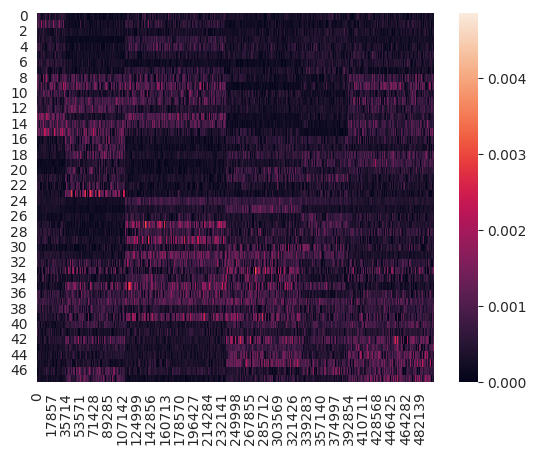

In [3]:
sns.heatmap(pValues)